## Big Processing Data


### Importation of Required Libraries
We're importing the following libraries for the project: Pyspark, Matplotlib, Seaborn, ...

Note: I am using Pycharm environment, so the environment is setup and doesn't need installation, but I'll also provide the code for install the libraries needed to run the project as well.

In [14]:
#
from pyspark.sql import SparkSession
from pyspark.sql.functions import *
from pyspark.sql.functions import col, sum as _sum, desc, asc
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

### Initialize Spark Session


In [2]:
# Initialize Spark Session
# spark = SparkSession.builder.appName("BigDataProcessing").getOrCreate()


# Initialize SparkSession in one line
spark = SparkSession.builder.appName("BigDataProcessing").master("local[*]").getOrCreate()

# Verify Spark session creation
print("Spark session created successfully!")

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
25/01/06 19:44:33 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


Spark session created successfully!


### Loading the Datasets
This analytics section will focus on using the follwing datasets: <b>DimProduct.csv, FactInternetSales.csv, DimCustomer.csv, DimCustomer.csv, DimSalesTerritory.csv</b>

In [5]:
# Load datasets
dim_product = spark.read.csv("Dataset/DimProduct.csv", header=True, inferSchema=True)
fact_sales = spark.read.csv("Dataset/FactInternetSales.csv", header=True, inferSchema=True)
dim_customer = spark.read.csv("Dataset/DimCustomer.csv", header=True, inferSchema=True)
dim_date = spark.read.csv("Dataset/DimDate.csv", header=True, inferSchema=True)
dim_sales_territory = spark.read.csv("Dataset/DimSalesTerritory.csv", header=True, inferSchema=True)

### Exploratory Data Analysis


In [ ]:
# # Cache datasets for performance
# fact_sales.cache()
# dim_customer.cache()
# dim_product.cache()
# dim_date.cache()
# dim_sales_territory.cache()

In [11]:
# Step 2: Descriptive Statistics
print("Overview of Sales Data")
fact_sales.describe().show()

print("Overview of Product Data")
dim_product.describe().show()

print("Overview of Customer Data")
dim_customer.describe().show()

print("Overview of Date Data")
dim_date.describe().show()

print("Overview of Sales Territory Data")
dim_sales_territory.describe().show()

Overview of Sales Data


+-------+------------------+-------------------+-------------------+--------------------+------------------+------------------+-----------------+------------------+----------------+--------------------+--------------+-------------+-----------------+-----------------+--------------------+--------------+-------------------+-----------------+-----------------+-----------------+------------------+---------------------+----------------+
|summary|        ProductKey|       OrderDateKey|         DueDateKey|         ShipDateKey|       CustomerKey|      PromotionKey|      CurrencyKey| SalesTerritoryKey|SalesOrderNumber|SalesOrderLineNumber|RevisionNumber|OrderQuantity|        UnitPrice|   ExtendedAmount|UnitPriceDiscountPct|DiscountAmount|ProductStandardCost| TotalProductCost|      SalesAmount|           TaxAmt|           Freight|CarrierTrackingNumber|CustomerPONumber|
+-------+------------------+-------------------+-------------------+--------------------+------------------+------------------+-

+-------+-----------------+--------------------------+--------------------+---------------------+-------------------+
|summary|SalesTerritoryKey|SalesTerritoryAlternateKey|SalesTerritoryRegion|SalesTerritoryCountry|SalesTerritoryGroup|
+-------+-----------------+--------------------------+--------------------+---------------------+-------------------+
|  count|               11|                        11|                  11|                   11|                 11|
|   mean|              6.0|                       5.0|                NULL|                 NULL|               NULL|
| stddev|  3.3166247903554|           3.3166247903554|                NULL|                 NULL|               NULL|
|    min|                1|                         0|           Australia|            Australia|             Europe|
|    max|               11|                        10|      United Kingdom|        United States|            Pacific|
+-------+-----------------+--------------------------+--

## Business and Research Questions
The Analysis will focus on the following product analysis, sales analysis, customer analysis, and financial analysis

- Customer Analysis<br>
<b>Business Questions:</b>
Who are the most valuable customers based on revenue and profit contributions?
What are the most common customer demographics (age, location, income, etc.)?
What are the most common reasons customers stop purchasing from us (using DimSalesReason)?

<b>Research Questions:</b>
What factors drive customer loyalty and repeat purchases?
Is there a relationship between customer demographics and promotion effectiveness?
How does customer behaviour differ based on product category preferences?



- Sales Analysis<br>
<b>Business Questions:</b>
Which products generate the highest sales revenue and profit margins?
How do sales trends vary across different sales territories (DimSalesTerritory)?
What are the most successful product categories and subcategories (DimProductCategory, DimProductSubcategory)?
Which sales channels (e.g., Resellers vs. Direct Sales) are performing best?


<b>Research Questions:</b>
What factors influence the success of sales promotions?
Are there patterns in sales that align with external factors such as holidays or economic trends?
Can we predict future sales performance using historical data (FactSalesTargets)?



- Financial Analysis
Business Questions
What is the trend in revenue and profit over time?
Which departments or organizations contribute the most to financial performance (DimOrganization, DimDepartmentGroup)?
Can we identify patterns in financial anomalies or irregularities?


- Product Analysis<br>

<b>Business Questions</b>
What are the most and least popular products?
How does product performance vary across different categories and subcategories?
Which products have the highest profitability margin?
What are the top-selling products for specific sales territories?

In [12]:
#What are the most and least popular products?
## Join FactInternetSales with DimProduct to get product names
sales_data = fact_sales.join(dim_product, fact_sales.ProductKey == dim_product.ProductKey)


In [15]:
# Aggregate sales data to calculate total quantity sold for each product
product_popularity = sales_data.groupBy("EnglishProductName") \
    .agg(_sum("OrderQuantity").alias("TotalQuantitySold")) \
    .orderBy(desc("TotalQuantitySold"))  # Sort in descending order


In [16]:
# Most popular products
most_popular = product_popularity.limit(10)  # Top 10 most popular products
most_popular.show()

+--------------------+-----------------+
|  EnglishProductName|TotalQuantitySold|
+--------------------+-----------------+
|Water Bottle - 30...|             4244|
| Patch Kit/8 Patches|             3191|
|  Mountain Tire Tube|             3095|
|      Road Tire Tube|             2376|
|Sport-100 Helmet,...|             2230|
|        AWC Logo Cap|             2190|
|Sport-100 Helmet,...|             2125|
|Fender Set - Moun...|             2121|
|Sport-100 Helmet,...|             2085|
|Mountain Bottle Cage|             2025|
+--------------------+-----------------+



In [17]:
# Least popular products
least_popular = product_popularity.orderBy(asc("TotalQuantitySold")).limit(10)
least_popular.show()

+--------------------+-----------------+
|  EnglishProductName|TotalQuantitySold|
+--------------------+-----------------+
|Mountain-100 Silv...|               36|
|Mountain-500 Silv...|               39|
|Mountain-500 Blac...|               41|
|Mountain-100 Silv...|               42|
|Mountain-500 Silv...|               45|
|Mountain-500 Silv...|               45|
|Mountain-100 Blac...|               45|
|Touring-3000 Yell...|               47|
|Touring-3000 Blue...|               48|
|Mountain-500 Silv...|               48|
+--------------------+-----------------+



In [ ]:
# Save results to CSV
most_popular.write.csv("MostPopularProducts.csv", header=True)
least_popular.write.csv("LeastPopularProducts.csv", header=True)

### Visualizing the Most and Least Popular Products

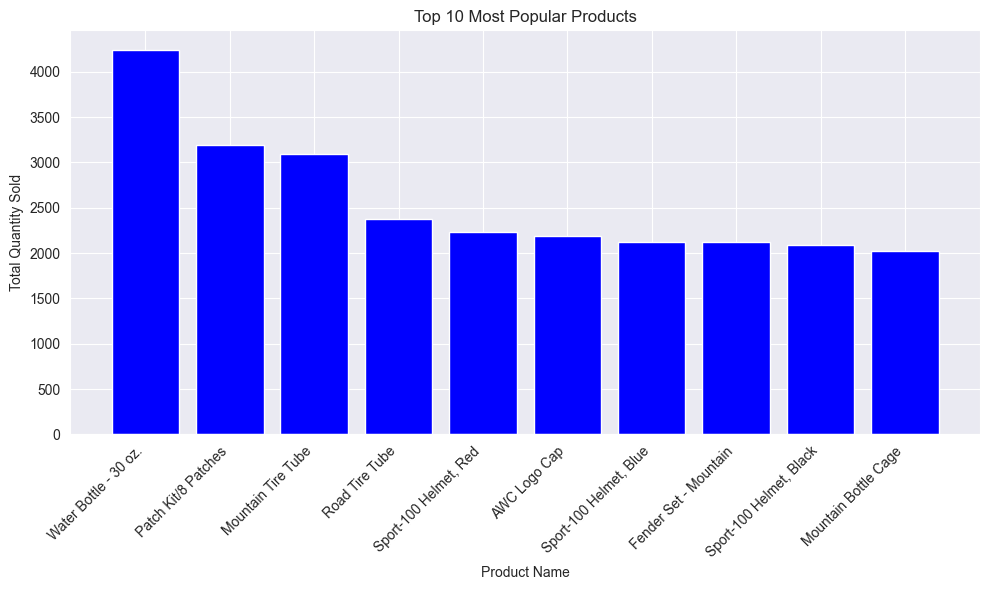

In [19]:
# Convert PySpark DataFrames to Pandas
most_popular_pd = most_popular.toPandas()
least_popular_pd = least_popular.toPandas()

# Visualization for Most Popular Products
plt.figure(figsize=(10, 6))
plt.bar(most_popular_pd['EnglishProductName'], most_popular_pd['TotalQuantitySold'], color='blue')
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Most Popular Products')
plt.xlabel('Product Name')
plt.ylabel('Total Quantity Sold')
plt.tight_layout()
plt.show()


In [ ]:


# Visualization for Least Popular Products
plt.figure(figsize=(10, 6))
plt.bar(least_popular_pd['EnglishProductName'], least_popular_pd['TotalQuantitySold'], color='red')
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Least Popular Products')
plt.xlabel('Product Name')
plt.ylabel('Total Quantity Sold')
plt.tight_layout()
plt.show()